In [1]:
#Import Module & Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
#Normalize the dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
#Define the model
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

In [5]:
#Compile Model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [6]:
#Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4929 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3765 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3390 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3147 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2955 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2812 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2686 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2590 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2496 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [7]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8809
Test accuracy: 0.8809000253677368


In [8]:
#Make PRedictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


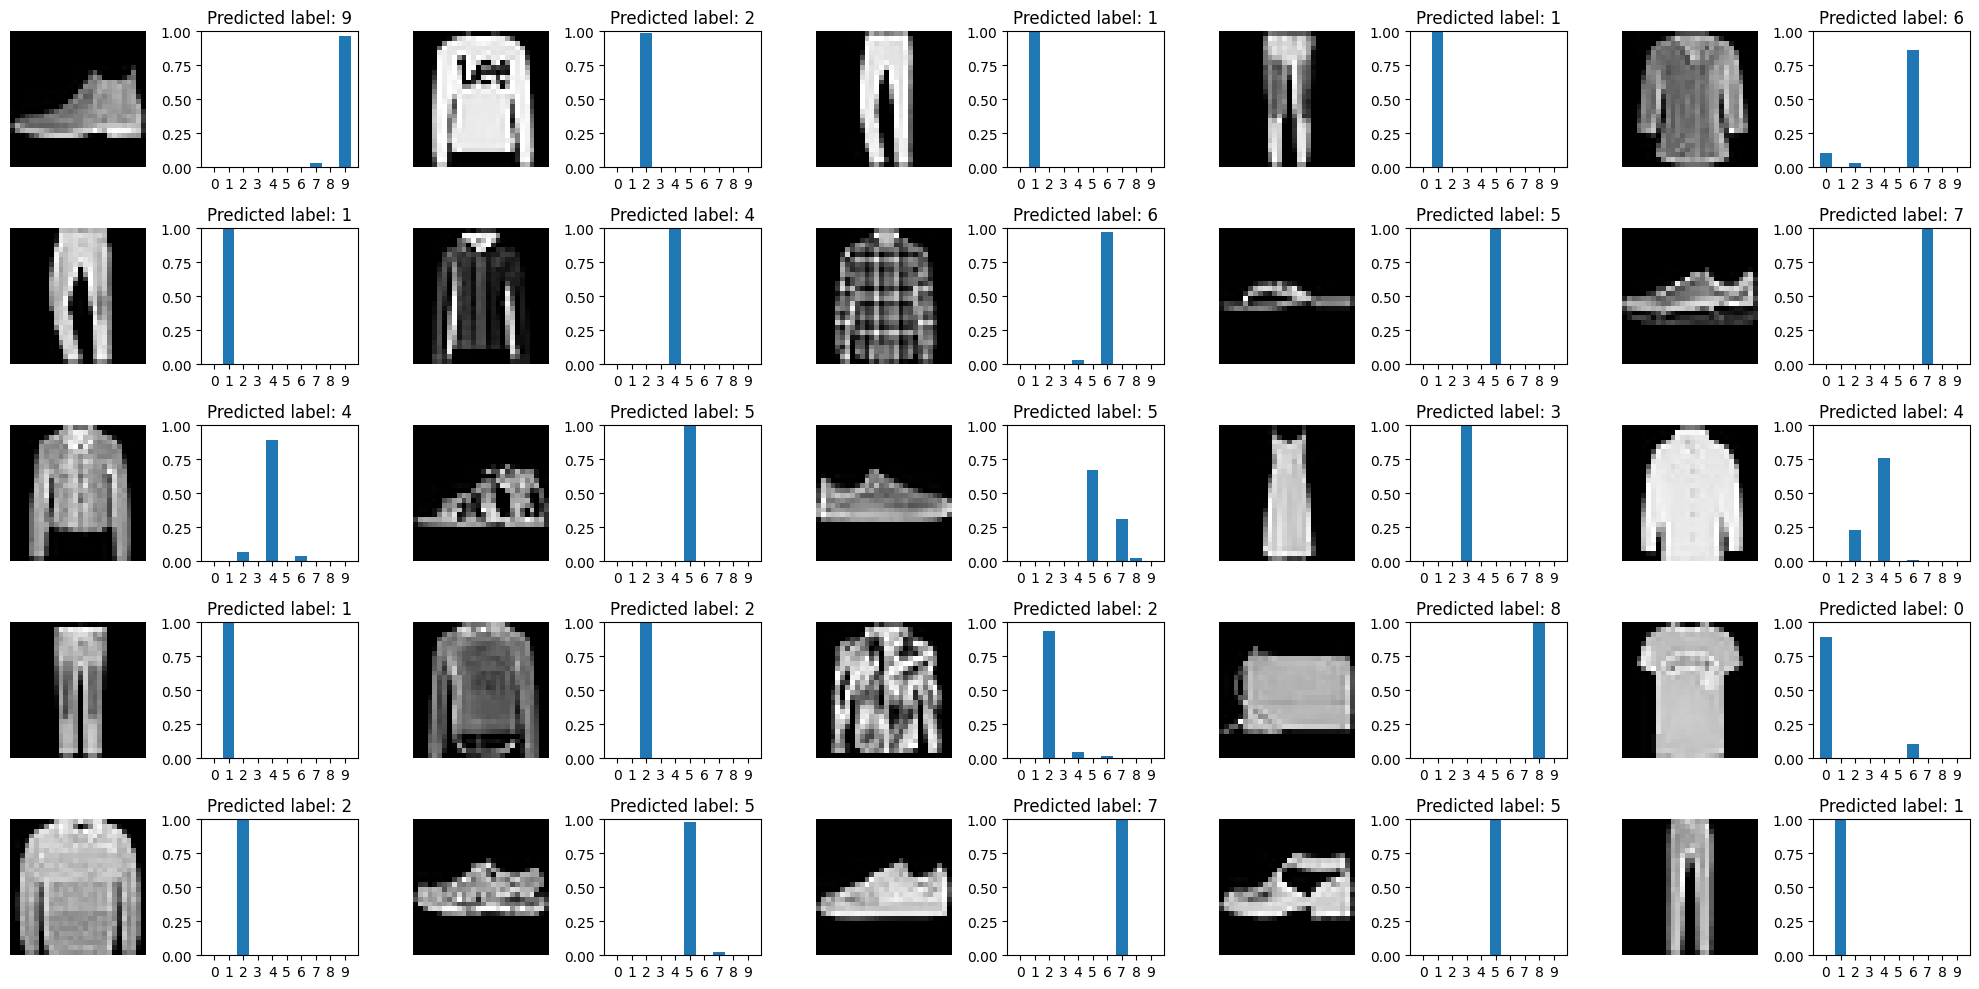

In [9]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.axis('off')
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.title(f"Predicted label: {predicted_labels[i]}")
    plt.tight_layout()
    
plt.show()